## Loading Data

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Student Performance.csv')

## Obtain label features

In [2]:
# convert these data into 2D numpy array
# order: math percentage, reading score percentage, writing score percentage
X = np.array([[df['math percentage'][0], 
              df['reading score percentage'][0], 
              df['writing score percentage'][0]]], 
             dtype = 'float')
for i in range(1,1000):
    X = np.append(X, [[df['math percentage'][i], 
                  df['reading score percentage'][i], 
                  df['writing score percentage'][i]]],axis=0)
print('feature matrix')
print(X)
print('size: ' + str(X.shape))
print()

# Standard = 0, Free/Reduced = 1
if(df['lunch'][0] == 'standard'):
    first_elem = 0
else:
    first_elem = 1
    
y = np.array([first_elem], dtype = 'int')
for i in range(1,1000):
    if(df['lunch'][i] == 'standard'):
        y = np.append(y, 0)
    else:
        y = np.append(y, 1)
print('Labels')
print(y)
print('size: ' + str(y.shape))

feature matrix
[[0.72 0.72 0.74]
 [0.69 0.9  0.88]
 [0.9  0.95 0.93]
 ...
 [0.59 0.71 0.65]
 [0.68 0.78 0.77]
 [0.77 0.86 0.86]]
size: (1000, 3)

Labels
[0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0

In [3]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=6.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

## Ensemble Learning
### Ensemble Learning uses a group of machine learning algorithms, and then combine the results of them using some techniques such as Voting to achieve higher accuracy.

### Using BootStrap

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

bootstarp_size = int(np.floor( 0.8 * len(X_train) ))
accuracy_list = list()

for i in range(0, 19):
    
    # Step1 (Bootstrapping)
    X_bag = resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
    y_bag = resample(y_train, n_samples = bootstarp_size , random_state=i , replace = True)
    
    # Step2 (Training)
    Base_DecisionTree = DecisionTreeClassifier(random_state=3)

    Base_logreg = LogisticRegression(max_iter=150)

    Base_knn = KNeighborsClassifier(n_neighbors=45)

    Base_rf = RandomForestClassifier(n_estimators=19)
        
    Base_eclf1 = VotingClassifier (estimators= [('dt', Base_DecisionTree), ('lr', Base_logreg), ('KNN', Base_knn), ('rf', Base_rf)], voting = 'hard')
    Base_eclf1 = Base_eclf1.fit(X_bag, y_bag)
    
    Base_eclf2 = VotingClassifier (estimators= [('dt', Base_DecisionTree), ('lr', Base_logreg), ('KNN', Base_knn), ('rf', Base_rf)], voting = 'soft')
    Base_eclf2 = Base_eclf2.fit(X_bag, y_bag)
    
    # Step3 (Base Learner Prediction)
    y_predict1 = Base_eclf1.predict(X_test)
    y_predict2 = Base_eclf2.predict(X_test)
    
    accuracy1 = accuracy_score(y_test, y_predict1)
    accuracy2 = accuracy_score(y_test, y_predict2)

    # Step4 (Voting)
    curr_acc_list = [accuracy1, accuracy2]
    accuracy_list.append(max(curr_acc_list))
print(max(accuracy_list))

0.6966666666666667


In [6]:
highest_val = 0
highest_val_index = 0
for i in range(0, len(accuracy_list)):
    if(highest_val < accuracy_list[i]):
        highest_val = accuracy_list[i]
        highest_val_index = i
print(highest_val_index)

15


#### Using BootStrap with Cross Validation

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

bootstarp_size = int(np.floor( 0.8 * len(X_train) ))
final_accuracy_list = list()

for i in range(0, 19):
    
    # Step1 (Bootstrapping)
    X_bag = resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
    y_bag = resample(y_train, n_samples = bootstarp_size , random_state=i , replace = True)
    
    # Step2 (Training)
    Base_DecisionTree = DecisionTreeClassifier(random_state=3)

    Base_logreg = LogisticRegression(max_iter=150)

    Base_knn = KNeighborsClassifier(n_neighbors=44)

    Base_rf = RandomForestClassifier(n_estimators=19)
        
    Base_eclf1 = VotingClassifier (estimators= [('dt', Base_DecisionTree), ('lr', Base_logreg), ('KNN', Base_knn), ('rf', Base_rf)], voting = 'hard')
    
    Base_eclf2 = VotingClassifier (estimators= [('dt', Base_DecisionTree), ('lr', Base_logreg), ('KNN', Base_knn), ('rf', Base_rf)], voting = 'soft')
        
    # Step3 (Base Learner Prediction)
    accuracy_list1 = cross_val_score(Base_eclf1, X_bag, y_bag, cv=10, scoring='accuracy')
    accuracy_list2 = cross_val_score(Base_eclf2, X_bag, y_bag, cv=10, scoring='accuracy')
    
    accuracy_cv1 = accuracy_list1.mean()
    accuracy_cv2 = accuracy_list2.mean()
        
    # Step4 (Voting)
    curr_max_acc = [accuracy_cv1, accuracy_cv2]
    final_accuracy_list.append(max(curr_max_acc))
    
print(max(final_accuracy_list))

0.8482142857142858


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

bootstarp_size = int(np.floor( 0.8 * len(X_train) ))
accuracy_list = list()

i = 15
    
# Step1 (Bootstrapping)
X_bag = resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
y_bag = resample(y_train, n_samples = bootstarp_size , random_state=i , replace = True)

# Step2 (Training)
Base_DecisionTree = DecisionTreeClassifier(random_state=3)

Base_logreg = LogisticRegression(max_iter=150)

Base_knn = KNeighborsClassifier(n_neighbors=45)

Base_rf = RandomForestClassifier(n_estimators=19)

Base_eclf1 = VotingClassifier (estimators= [('dt', Base_DecisionTree), ('lr', Base_logreg), ('KNN', Base_knn), ('rf', Base_rf)], voting = 'hard')
Base_eclf1 = Base_eclf1.fit(X_bag, y_bag)

Base_eclf2 = VotingClassifier (estimators= [('dt', Base_DecisionTree), ('lr', Base_logreg), ('KNN', Base_knn), ('rf', Base_rf)], voting = 'soft')
Base_eclf2 = Base_eclf2.fit(X_bag, y_bag)

# Step3 (Base Learner Prediction)
y_predict1 = Base_eclf1.predict(X_test)
y_predict2 = Base_eclf2.predict(X_test)

accuracy1 = accuracy_score(y_test, y_predict1)
accuracy2 = accuracy_score(y_test, y_predict2)

# Step4 (Voting)
print("Hard accuracy: " + str(accuracy1))
print("Soft accuracy: " + str(accuracy2))

Hard accuracy: 0.6866666666666666
Soft accuracy: 0.66


In [9]:
# Predicting the Binary Label:
y_predict = Base_eclf2.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = Base_eclf2.predict_proba(X_test)

In [10]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob[:,1])

[0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0]
[1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [11]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=0)

print(fpr)
print(tpr)

[0.         0.00884956 0.01769912 0.01769912 0.10619469 0.10619469
 0.16814159 0.16814159 0.18584071 0.18584071 0.19469027 0.19469027
 0.21238938 0.21238938 0.2300885  0.2300885  0.23893805 0.23893805
 0.25663717 0.25663717 0.2920354  0.2920354  0.30973451 0.30973451
 0.31858407 0.31858407 0.34513274 0.34513274 0.3539823  0.3539823
 0.40707965 0.40707965 0.4159292  0.4159292  0.42477876 0.42477876
 0.43362832 0.43362832 0.44247788 0.44247788 0.46902655 0.46902655
 0.50442478 0.50442478 0.51327434 0.51327434 0.56637168 0.56637168
 0.57522124 0.57522124 0.5840708  0.5840708  0.59292035 0.59292035
 0.60176991 0.60176991 0.61061947 0.61061947 0.61946903 0.61946903
 0.62831858 0.62831858 0.63716814 0.63716814 0.66371681 0.66371681
 0.68141593 0.68141593 0.69026549 0.69026549 0.69911504 0.69911504
 0.7079646  0.7079646  0.71681416 0.71681416 0.72566372 0.72566372
 0.73451327 0.73451327 0.75221239 0.75221239 0.76106195 0.76106195
 0.7699115  0.7699115  0.77876106 0.77876106 0.78761062 0.78761

# AUC:

In [12]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.3416071175050873


# ROC Curve:

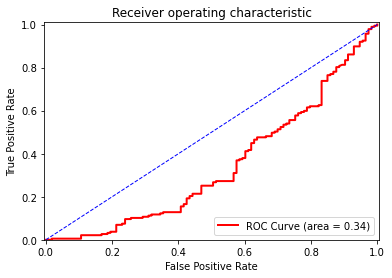

In [13]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Conclusion
### Model accuracy: 0.84 with Cross Validation
### Model accuracy: 0.69 without Cross Validation